**Загрузка данных, чтение датасета и вывод первых строк**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('S02-hw-dataset.csv')
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


**Вывод информации о столбцах и типах**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


**Базовые описательные статистики**

In [6]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


**Доля пропусков**

In [7]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

**Проверка дубликатов**

In [ ]:
print(df.duplicated().sum()) #Количество дубликатов
df[df.duplicated(keep=False)] #Полные дубликаты

1


,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


**Подозрительные значения**

In [19]:
df[df['purchases'] < 0] #Отрицательные покупки
df[(df['age'] > 100) | (df['age'] < 5)] #Возраст больше 120 или меньше 5

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [20]:
df[(df['revenue'] == 0) & (df['purchases'] > 0)] #Нулевой revenue при ненулевых purchases

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


В данном датасете были обнаружены: Пропуски в столбце age; 2 строки, дублирующие друг друга; Строка с отрицательным значением покупок и возрастом более 10 лет и одна строка с логическим противоречием в виде нулевого revenue при ненулевых purchases

**Частота по странам**

In [21]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

**Группировка по странам с агрегатами через groupby**

In [22]:
grouped = df.groupby('country').agg({
    'age': 'mean',
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
})
grouped

age purchases          revenue       
              mean      mean sum         mean    sum
country                                             
CN       24.000000  4.500000   9  1054.000000   2108
DE       34.600000  6.500000  39  1445.500000   8673
FR       46.250000  4.250000  51   675.916667   8111
RU       30.076923  4.769231  62   790.076923  10271
US       36.714286  4.625000  37   557.375000   4459

**Распределение по возрастным группам**

In [24]:
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 120], 
                        labels=['<25', '25-35', '35-45', '45-55', '55+'])
df['age_group'].value_counts()

age_group
<25      12
25-35    11
45-55     8
35-45     6
55+       2
Name: count, dtype: int64

Наблюдения по группировкам: Самой частой страной в датасете является Россия (RU); Наибольшее среднее выручки и покупок у Германии (DE), а у Франции (FR) - наибольший средний возраст; Наиболее представленная возрастная группа - до 25 лет.

**Гистограмма для возраста**

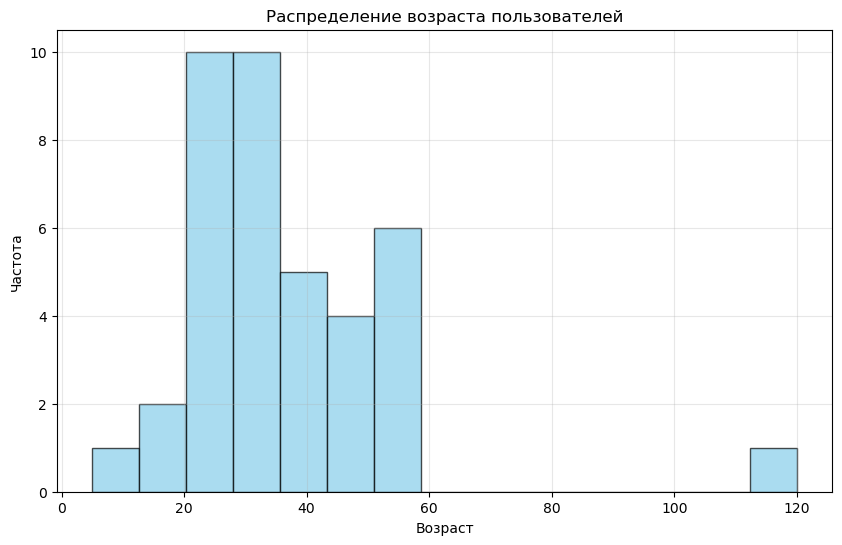

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста пользователей')
plt.grid(True, alpha=0.3)
plt.savefig('age_histogram.png')
plt.show()

**Боксполот для выручки по странам**

OSError: [Errno 22] Invalid argument: 'D:\\GTA\\project_ii\\homeworks\\HW02\x0cigures\revenue_boxplot.png'

<Figure size 1000x600 with 0 Axes>

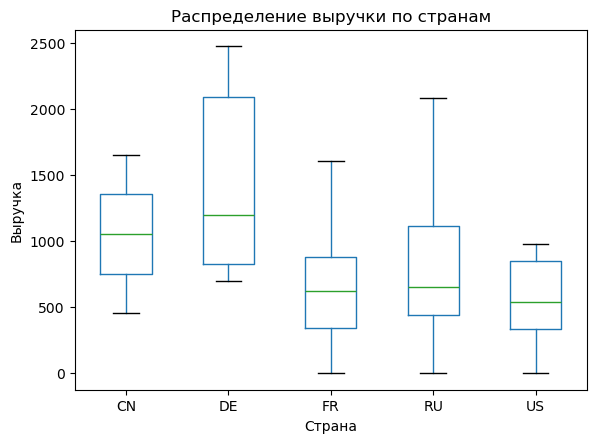

In [30]:
plt.figure(figsize=(10, 6))
df.boxplot(column='revenue', by='country', grid=False)
plt.title('Распределение выручки по странам')
plt.suptitle('') 
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.savefig('D:\GTA\project_ii\homeworks\HW02\figures\revenue_boxplot.png')
plt.show()

**scatter plot для возраста и выручки**

OSError: [Errno 22] Invalid argument: 'D:\\GTA\\project_ii\\homeworks\\HW02\x0cigures\x07ge_vs_revenue_scatter.png'

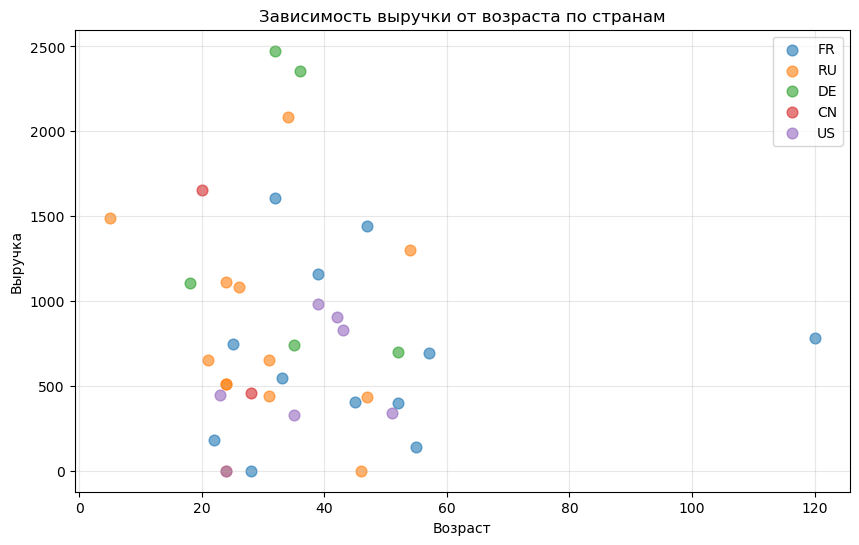

In [29]:
plt.figure(figsize=(10, 6))
colors = {'RU': 'red', 'FR': 'blue', 'US': 'green', 'DE': 'orange', 'CN': 'purple'}

for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.scatter(country_data['age'], country_data['revenue'], 
               label=country, alpha=0.6, s=60)

plt.xlabel('Возраст')
plt.ylabel('Выручка')
plt.title('Зависимость выручки от возраста по странам')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:\GTA\project_ii\homeworks\HW02\figures\age_vs_revenue_scatter.png')
plt.show()